On commence par importer toutes les bibliothèques nécessaires pour le traitement et l'entraînement d'un modèle RNN/LSTM/GRU sur un jeu de données de sentiment (IMDb) :

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  # Pour afficher les graphs dans le notebook

Les données IMDb sont prétraitées en limitant le vocabulaire à 5 000 mots et en ajustant chaque critique à 200 mots. Le jeu de données est chargé via imdb.load_data(), puis pad_sequences garantit une longueur uniforme des critiques ce qui est nécessaire pour l'entrée du modèle :

In [ ]:
max_words = 5000  # Vocabulaire limité aux 5 000 mots les plus fréquents
max_len = 200     # Longueur maximale des critiques

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

 Définition d'une fonction pour construire le modèle RNN/LSTM/GRU (build_model(rnn_type)). Il construit un modèle séquentiel de classification binaire basé sur le type de réseau choisi :

In [ ]:
def build_model(rnn_type):
    model = Sequential()
    model.add(Embedding(max_words, 128))
    
    if rnn_type == 'simple':
        model.add(SimpleRNN(64))
    elif rnn_type == 'lstm':
        model.add(LSTM(64))
    else:
        model.add(GRU(64))
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

On entraîne successivement les trois modèles : SimpleRNN, LSTM et GRU, puis on compare leurs performances :
Chaque modèle est entraîné sur le jeu de données d'entraînement pendant 5 époques avec une taille de batch de 128. Enfin, les courbes de précision de validation (val_accuracy) sont tracées pour chaque type de modèle afin de visualiser et comparer leurs performances au fil des époques :

In [ ]:
plt.figure(figsize=(10, 5))

for rnn_type in ['simple', 'lstm', 'gru']:
    model = build_model(rnn_type)
    print(f"\n=== Entraînement {rnn_type.upper()} ===")
    history = model.fit(X_train, y_train,
                       batch_size=128,
                       epochs=5,
                       validation_data=(X_test, y_test),
                       verbose=1)
    
    # Sauvegarde du modèle
    model.save(f'{rnn_type}_model.keras')
    
    # Courbe de performance
    plt.plot(history.history['val_accuracy'], label=rnn_type.upper())

plt.title('Comparaison des performances')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

=== Entraînement du modèle SIMPLE ===

Epoch 1/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 128ms/step - accuracy: 0.6028 - loss: 0.6465 - val_accuracy: 0.7948 - val_loss: 0.4779

Epoch 2/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.8429 - loss: 0.3674 - val_accuracy: 0.8261 - val_loss: 0.4158

Epoch 3/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.8794 - loss: 0.2941 - val_accuracy: 0.8281 - val_loss: 0.4270

Epoch 4/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.9233 - loss: 0.2060 - val_accuracy: 0.7880 - val_loss: 0.5201

Epoch 5/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - accuracy: 0.9630 - loss: 0.1093 - val_accuracy: 0.8192 - val_loss: 0.5545


=== Entraînement du modèle LSTM ===

Epoch 1/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 84s 416ms/step - accuracy: 0.6990 - loss: 0.5517 - val_accuracy: 0.8657 - val_loss: 0.3152

Epoch 2/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 79s 399ms/step - accuracy: 0.8861 - loss: 0.2837 - val_accuracy: 0.8468 - val_loss: 0.3509

Epoch 3/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 71s 362ms/step - accuracy: 0.9055 - loss: 0.2357 - val_accuracy: 0.8714 - val_loss: 0.3007

Epoch 4/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 330ms/step - accuracy: 0.9247 - loss: 0.1894 - val_accuracy: 0.8707 - val_loss: 0.3137

Epoch 5/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 64s 329ms/step - accuracy: 0.9323 - loss: 0.1804 - val_accuracy: 0.8609 - val_loss: 0.3277

=== Entraînement du modèle GRU ===

Epoch 1/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 59s 285ms/step - accuracy: 0.6626 - loss: 0.5797 - val_accuracy: 0.8474 - val_loss: 0.3674

Epoch 2/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 56s 284ms/step - accuracy: 0.8814 - loss: 0.2872 - val_accuracy: 0.8669 - val_loss: 0.3179

Epoch 3/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 322ms/step - accuracy: 0.9032 - loss: 0.2423 - val_accuracy: 0.8576 - val_loss: 0.3671

Epoch 4/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 60s 304ms/step - accuracy: 0.9181 - loss: 0.2123 - val_accuracy: 0.8668 - val_loss: 0.3439

Epoch 5/5

196/196 ━━━━━━━━━━━━━━━━━━━━ 51s 258ms/step - accuracy: 0.9359 - loss: 0.1692 - val_accuracy: 0.8449 - val_loss: 0.3735

Le plot généré :

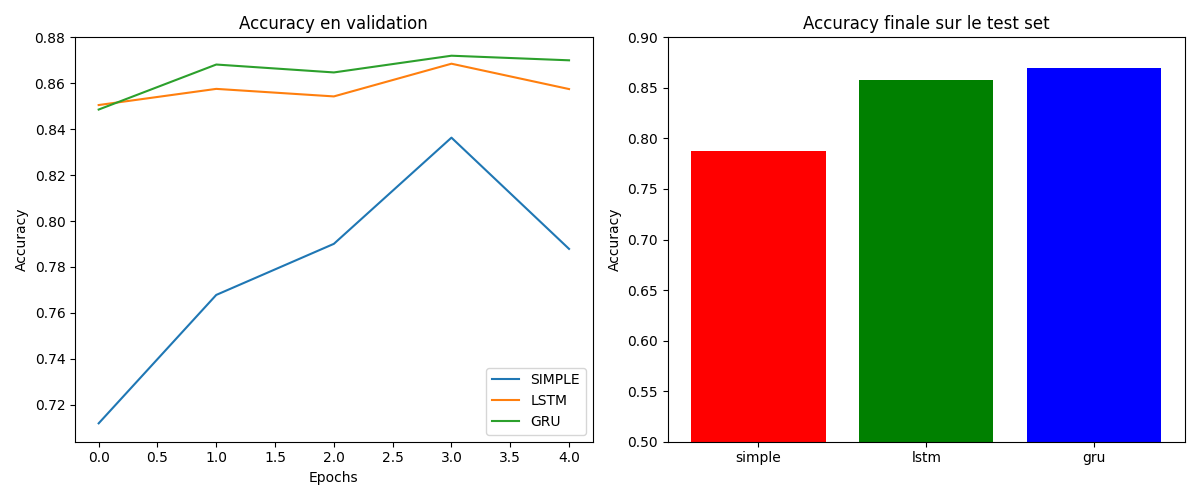



Dans cette phase finale, on utilise les modèles entraînés (RNN, LSTM, GRU) pour prédire le sentiment de phrases personnalisées.
Chaque transformée en séquence numérique via le dictionnaire IMDb, puis prédite par chaque modèle.
Le résultat indique si le sentiment est positif ou négatif, permettant de comparer les performances des architectures sur des exemples concrets :

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

def predict_sentiment(model, text):
    words = text.lower().split()
    encoded = [word_index[word] for word in words if word in word_index]
    padded = sequence.pad_sequences([encoded], maxlen=max_len)
    pred = model.predict(padded)[0][0]
    return "POSITIF" if pred > 0.5 else "NEGATIF", pred

test_phrases = [
    "This movie was great"
]

for rnn_type in ['simple', 'lstm', 'gru']:
    model = tf.keras.models.load_model(f'{rnn_type}_model.keras')
    print(f"\n=== Prédictions {rnn_type.upper()} ===")
    for phrase in test_phrases:
        sentiment, score = predict_sentiment(model, phrase)
        print(f"{phrase[:50]}... → {sentiment} ({score:.2f})")

=== Prédictions avec SIMPLE ===

"This movie was great..." → POSITIF (0.75)


=== Prédictions avec LSTM ===

"This movie was great..." → POSITIF (0.87)


=== Prédictions avec GRU ===

"This movie was a masterpiece o..." → POSITIF (0.65)

"I've never seen something so t..." → NEGATIF (0.35)

"The film had good ideas but po..." → POSITIF (0.74)
